In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import csv

#NEED TO CHANGE FILEPATH ON GITHUB
BANKDATA = r"/Users/meisan/Documents/GitHub/GA-DAT9-Projects1/R_Morgan_Project4_Files/Bank_Marketing_Data.csv"
with open(BANKDATA, 'r') as b:
    data = b.read()
    new_data = data.replace('"','')
sep_data = new_data.split('\n')

#split each row into list, append each new list as an element of 'bank_data'
bank_data = []
for row in sep_data:
    bank_data.append(row.split(';'))
    
dl = pd.DataFrame(bank_data)
dl.columns = dl.iloc[0]
dh = dl.drop(dl.index[0])
df = dh.drop(dh.index[-1])
df.dtypes

0
age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

In [2]:
#give columns clearer names
df.rename(columns={'housing':'has_housing_loan','loan':'has_personal_loan','contact':'contact_method','month':'last_comm_month','day_of_week':'last_comm_weekday','duration':'last_comm_duration','campaign':'contacts_during_campaign','pdays':'prev_camp_days_passed','previous':'num_prev_contacts','poutcome':'prev_camp_outcome','emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','euribor3m':'euribor_3m','nr.employed':'num_employed','y':'converted'}, inplace=True)
df.head()

,age,job,marital,education,default,has_housing_loan,has_personal_loan,contact_method,last_comm_month,last_comm_weekday,...,contacts_during_campaign,prev_camp_days_passed,num_prev_contacts,prev_camp_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,num_employed,converted
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [3]:
#redefine the type of numeric columns
df['age'] = df.age.astype(int)
df['last_comm_duration'] = df.last_comm_duration.astype(int)
df['contacts_during_campaign'] = df.contacts_during_campaign.astype(int)
df['prev_camp_days_passed'] = df.prev_camp_days_passed.astype(int)
df['num_prev_contacts'] = df.num_prev_contacts.astype(int)
df['emp_var_rate'] = df.emp_var_rate.astype(float)
df['cons_price_idx'] = df.cons_price_idx.astype(float)
df['cons_conf_idx'] = df.cons_conf_idx.astype(float)
df['euribor_3m'] = df.euribor_3m.astype(float)
df['num_employed'] = df.num_employed.astype(float)
df.dtypes

0
age                           int64
job                          object
marital                      object
education                    object
default                      object
has_housing_loan             object
has_personal_loan            object
contact_method               object
last_comm_month              object
last_comm_weekday            object
last_comm_duration            int64
contacts_during_campaign      int64
prev_camp_days_passed         int64
num_prev_contacts             int64
prev_camp_outcome            object
emp_var_rate                float64
cons_price_idx              float64
cons_conf_idx               float64
euribor_3m                  float64
num_employed                float64
converted                    object
dtype: object

In [4]:
df.describe(include='all')

,age,job,marital,education,default,has_housing_loan,has_personal_loan,contact_method,last_comm_month,last_comm_weekday,...,contacts_during_campaign,prev_camp_days_passed,num_prev_contacts,prev_camp_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,num_employed,converted
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


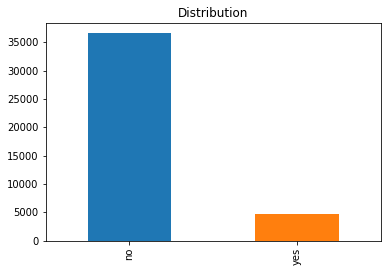

In [5]:
subs_dist = df['converted'].value_counts()
subs_dist.plot.bar(x = 'converted', title='Distribution')

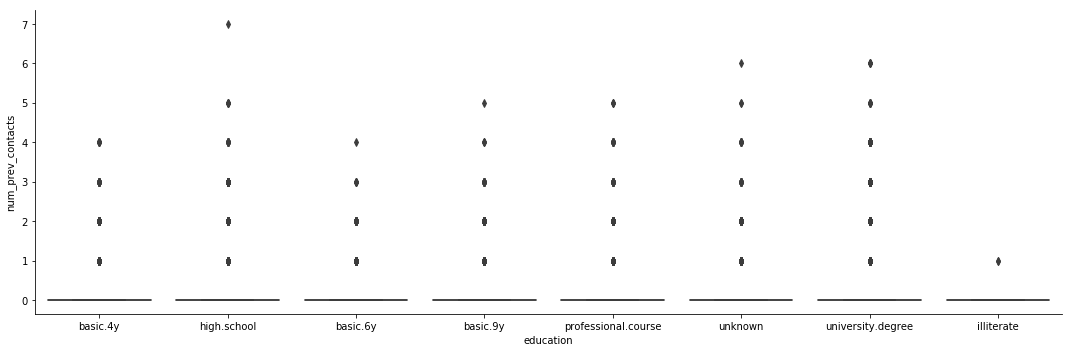

In [6]:
sns.catplot(x="education", y="num_prev_contacts", kind="box", data=df, aspect=3)

In [7]:
df.corr()

,age,last_comm_duration,contacts_during_campaign,prev_camp_days_passed,num_prev_contacts,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,num_employed
0,,,,,,,,,,
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
last_comm_duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
contacts_during_campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
prev_camp_days_passed,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
num_prev_contacts,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor_3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154


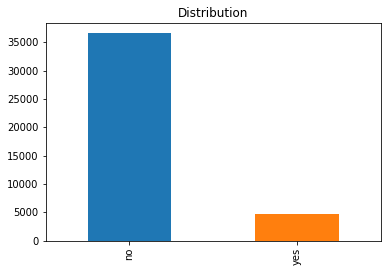

In [8]:
subs_dist.plot.bar(x='converted', title='Distribution')

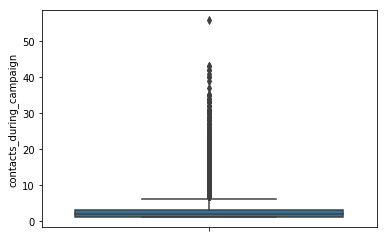

In [9]:
sns.boxplot(y=df['contacts_during_campaign'])

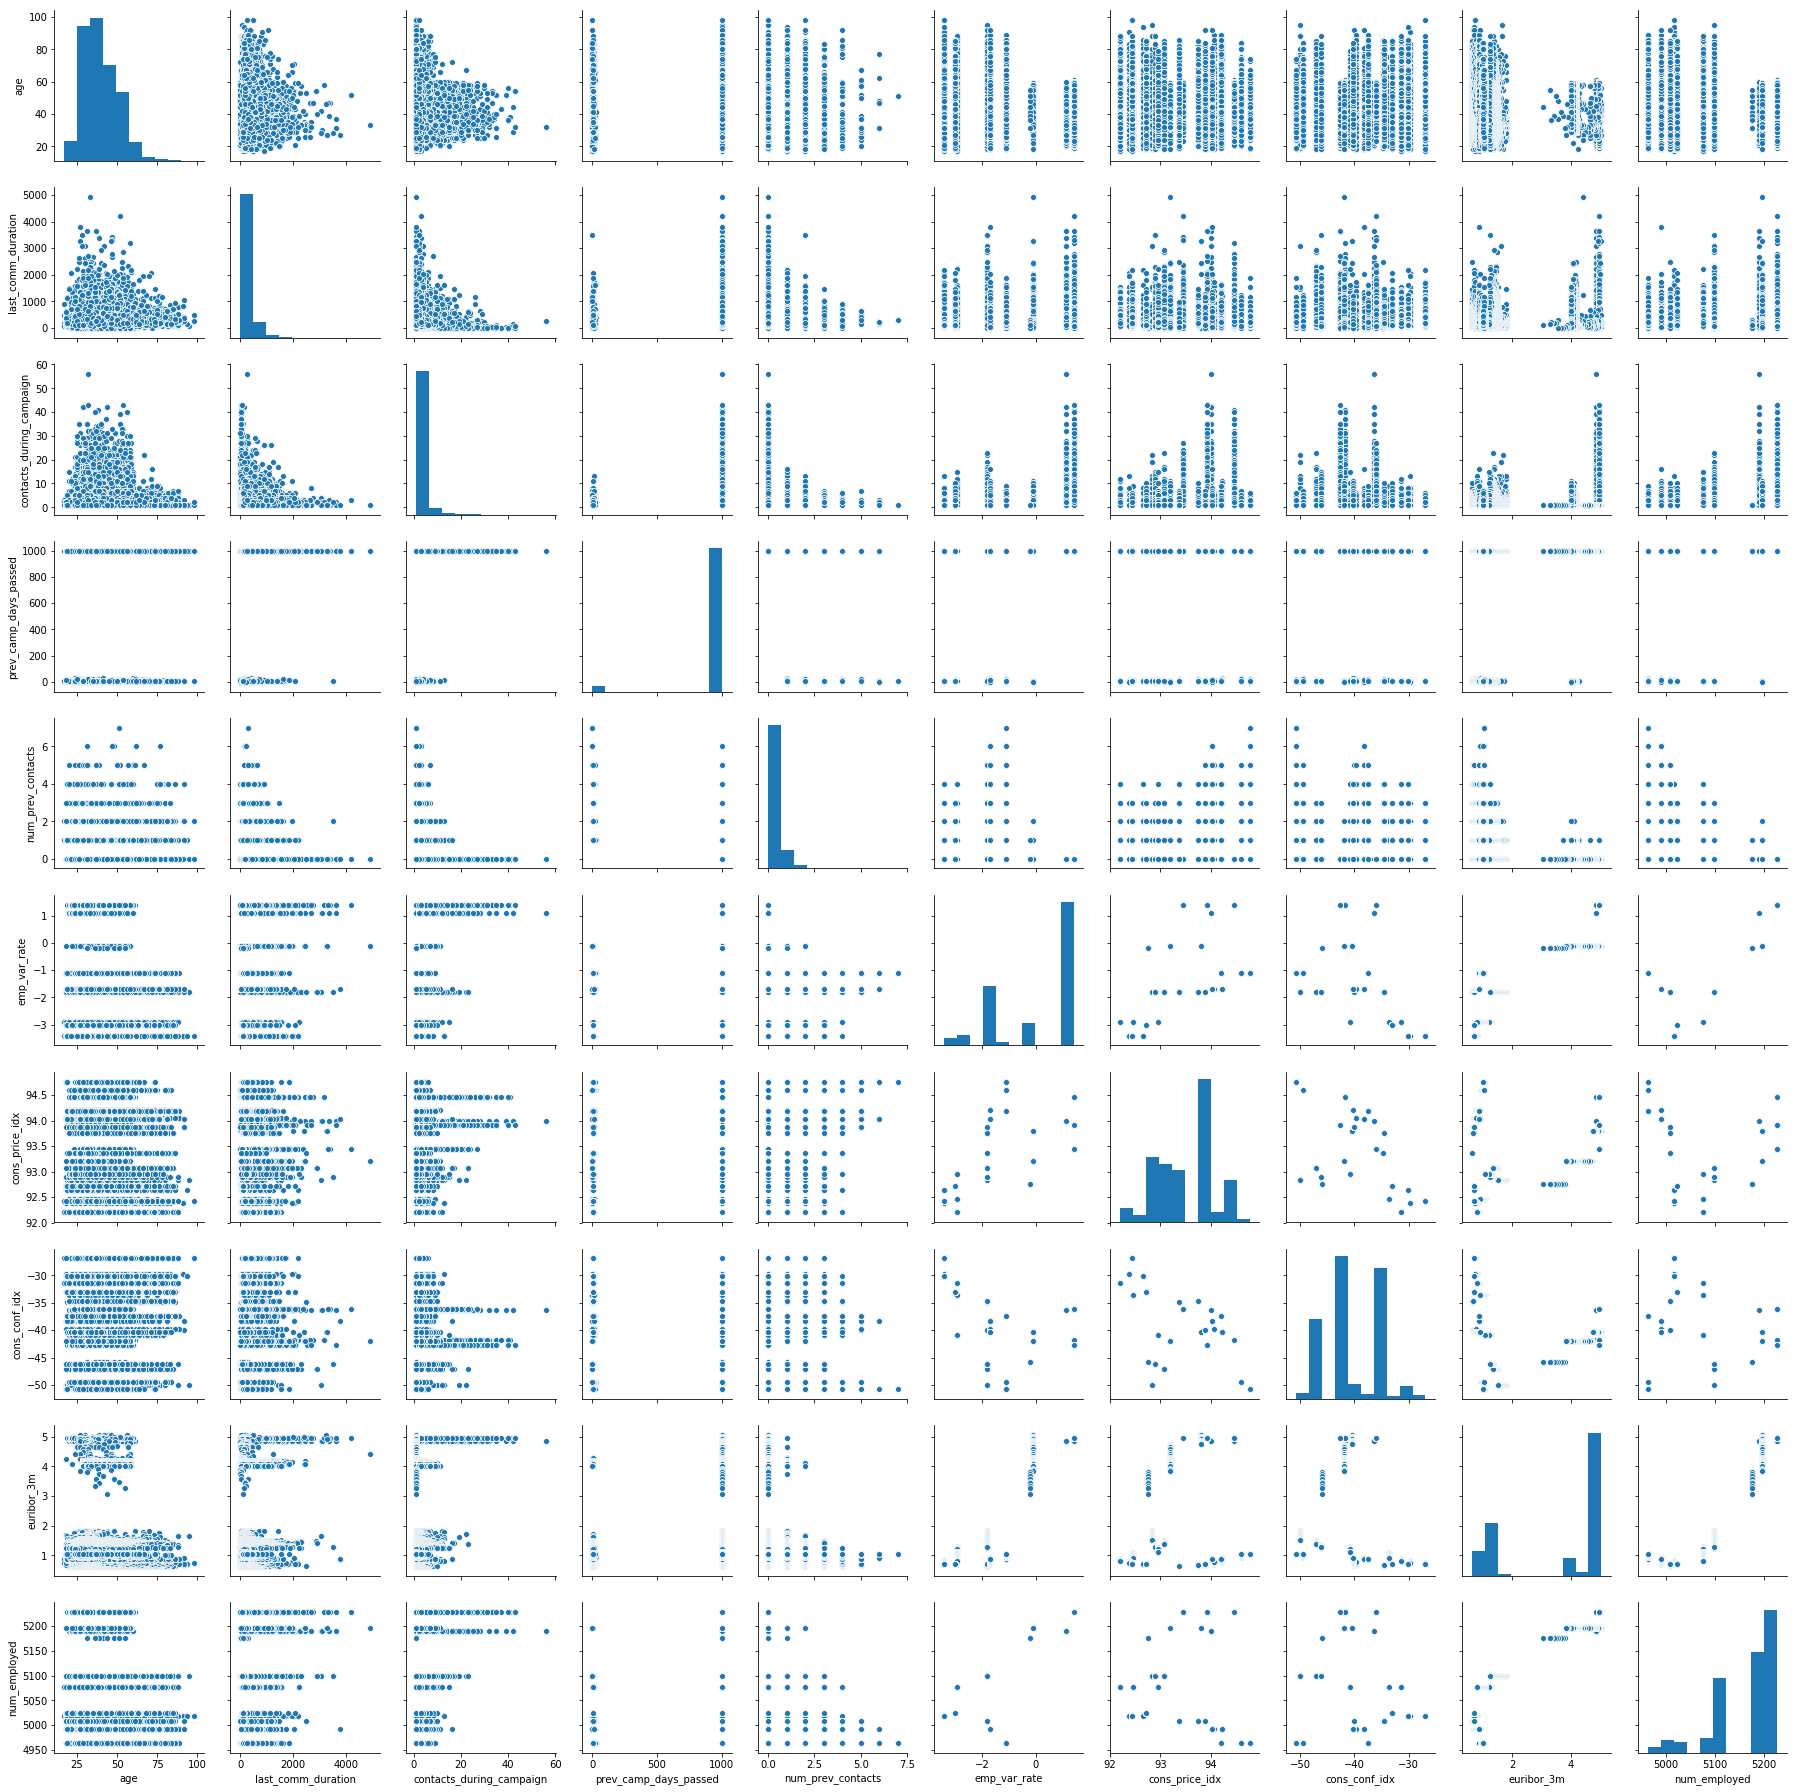

In [10]:
sns.pairplot(df)

In [17]:
df.nunique()

0
age                           78
job                           12
marital                        4
education                      8
default                        3
has_housing_loan               3
has_personal_loan              3
contact_method                 2
last_comm_month               10
last_comm_weekday              5
last_comm_duration          1544
contacts_during_campaign      42
prev_camp_days_passed         27
num_prev_contacts              8
prev_camp_outcome              3
emp_var_rate                  10
cons_price_idx                26
cons_conf_idx                 26
euribor_3m                   316
num_employed                  11
converted                      2
dtype: int64

In [12]:
df.shape

(41188, 21)

In [13]:
def corr_cols(x,y):
    print(df[x].corr(df[y]))

corr_cols('contacts_during_campaign','last_comm_duration')

-0.07169922626415345


In [14]:
def bank_std(col1):
    print(df[col1].std())
    
bank_std('contacts_during_campaign')

2.7700135429021127


In [15]:
df.isnull().sum()

0
age                         0
job                         0
marital                     0
education                   0
default                     0
has_housing_loan            0
has_personal_loan           0
contact_method              0
last_comm_month             0
last_comm_weekday           0
last_comm_duration          0
contacts_during_campaign    0
prev_camp_days_passed       0
num_prev_contacts           0
prev_camp_outcome           0
emp_var_rate                0
cons_price_idx              0
cons_conf_idx               0
euribor_3m                  0
num_employed                0
converted                   0
dtype: int64

In [16]:
df.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186, 41187,
            41188],
           dtype='int64', length=41188)